<a href="https://colab.research.google.com/github/Thomascc123/Proyecto-Kaggle-Modelos/blob/master/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga Del Archivo

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.22GB/s]


## Descomprimiendo

In [3]:
!unzip udea*.zip > /dev/null

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
example = pd.read_csv('submission_example.csv')

In [55]:
train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#Limpeza de las columnas

In [22]:
train.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [48]:
train.isnull().mean()*100

,0
ID,0.000000
PERIODO_ACADEMICO,0.000000
E_PRGM_ACADEMICO,0.000000
E_PRGM_DEPARTAMENTO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENEINTERNET,3.845343
F_EDUCACIONPADRE,3.347004
F_TIENELAVADORA,5.743394


In [56]:
traincopy = train.copy()

In [65]:
def viewValues(df, column):
  print(df[column].fillna("null", inplace=False).value_counts())
  df[column].fillna("null", inplace=False).value_counts().plot(kind='bar')

In [66]:
def fillDefault(df, column, value):
  df[column].fillna(value, inplace=True)

### E_VALORMATRICULAUNIVERSIDAD

E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
null                                          6287
Name: count, dtype: int64


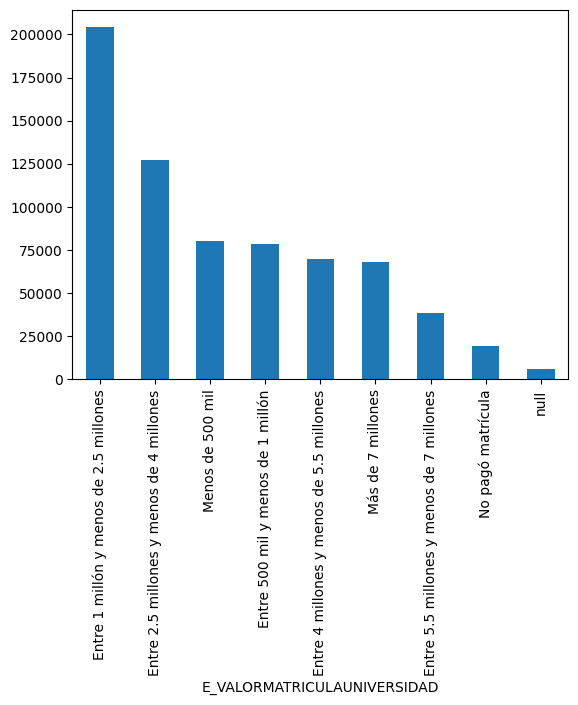

In [67]:
viewValues(train, "E_VALORMATRICULAUNIVERSIDAD")

In [68]:
#traincopy['E_VALORMATRICULAUNIVERSIDAD'].fillna("No pagó matrícula", inplace=True)
fillDefault(traincopy, 'E_VALORMATRICULAUNIVERSIDAD', "No pagó matrícula")

E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            25815
Name: count, dtype: int64


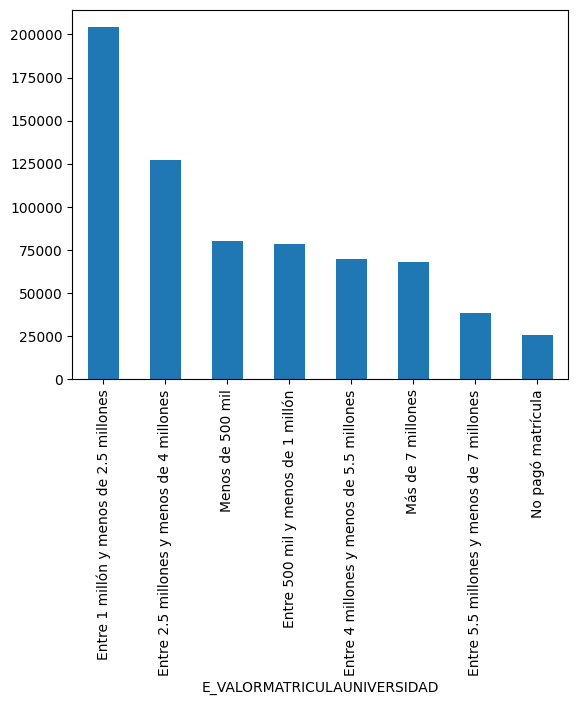

In [71]:
viewValues(traincopy, 'E_VALORMATRICULAUNIVERSIDAD')

### E_HORASSEMANATRABAJA

E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
null                    30857
Name: count, dtype: int64


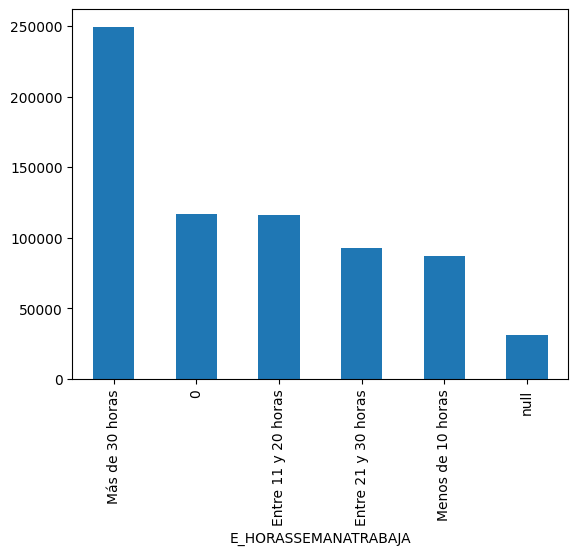

In [72]:
viewValues(train, 'E_HORASSEMANATRABAJA')

In [73]:
fillDefault(traincopy, 'E_HORASSEMANATRABAJA', "0")

E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      147407
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


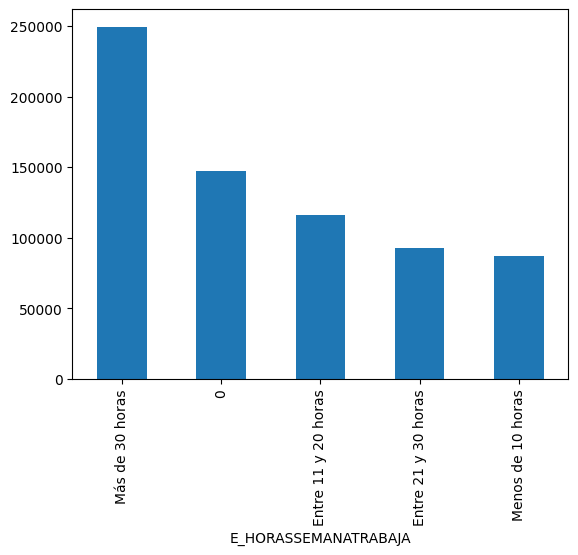

In [74]:
viewValues(traincopy, 'E_HORASSEMANATRABAJA')

## F_ESTRATOVIVIENDA

F_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
null            32137
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


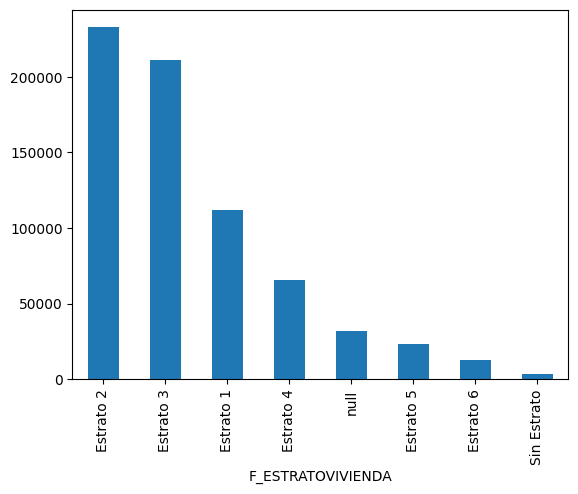

In [75]:
viewValues(train, 'F_ESTRATOVIVIENDA')